# Cleaning Dataset

In [1]:
# Importing of dependencies required for analysis
import pandas as pd
import sklearn as skl
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
import requests
import urllib.parse
import datetime
import time
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in the uncleaned inactive listings dataset
df = pd.read_csv('Resources_Uncleaned/Inactive_Listings_Raw.csv')
df

,LSC,EC,St#,Street Name,Abbr,Dir,Municipality,Community,List Price,Sold Price,...,Fam,Kit,Gar Type,(A/C),Heat,Contract Date,Sold Date,List Brokerage,Co-Op Brokerage,MLS #
0,Sld,NaN,793 Adelaide St W,NaN,NaN,NaN,Toronto C00,Niagara,"$699,999","$780,000",...,N,1.0,None,Central Air,Gas,1/13/2021,1/21/2021,ROYAL LEPAG...,CENTURY 21 HE...,C5083064
1,Sld,NaN,75 Major St,NaN,NaN,NaN,Toronto C01,University,"$799,000","$1,225,000",...,Y,2.0,None,None,Gas,5/29/2020,6/4/2020,ROYAL LEPAG...,RE/MAX REALTR...,C4773721
2,Sld,NaN,81 Major St,NaN,NaN,NaN,Toronto C01,University,"$799,000","$1,203,000",...,N,2.0,None,None,Gas,11/5/2020,11/6/2020,CENTURY 21 ...,"RIFE REALTY, ...",C4979474
3,Sld,N,784 Adelaide St W,NaN,NaN,NaN,Toronto C01,Niagara,"$899,000","$959,000",...,Y,1.0,None,Central Air,Gas,9/22/2020,10/1/2020,RE/MAX WEST...,HOMELIFE CULT...,C4923168
4,Sld,NaN,16 Whitaker Ave,NaN,NaN,NaN,Toronto C01,Niagara,"$899,000","$1,073,000",...,N,1.0,None,Central Air,Gas,11/10/2020,11/17/2020,KELLER WILL...,"THE AGENCY, B...",C4985281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31912,Sld,NaN,8 Wardlaw Cres,NaN,NaN,NaN,Toronto W10,Thistletown-Beaumonde Heights,"$1,299,900","$1,300,000",...,N,1.0,Attached,Central Air,Gas,10/3/2021,12/28/2021,CENTURY 21 ...,RE/MAX PARAMO...,W5391840
31913,Sld,NaN,156 Thistle Down Blvd,NaN,NaN,NaN,Toronto W10,Thistletown-Beaumonde Heights,"$1,349,000","$1,365,000",...,N,1.0,Attached,Central Air,Gas,11/12/2021,11/20/2021,SUTTON GROU...,INTERNATIONAL...,W5430335
31914,Sld,NaN,11 Woodlot Cres,NaN,NaN,NaN,Toronto W10,West Humber-Clairville,"$1,599,900","$1,600,000",...,Y,1.0,Attached,Central Air,Gas,12/17/2021,1/3/2022,HOMELIFE CU...,CENTURY 21 GR...,W5458498
31915,Sld,NaN,16 Forest Path Crt,NaN,NaN,NaN,Toronto W10,Thistletown-Beaumonde Heights,"$1,750,000","$1,850,000",...,Y,1.0,Attached,Central Air,Gas,12/2/2021,12/23/2021,WORLD CLASS...,WORLD CLASS R...,W5447590


In [3]:
# Check for null values within the dataframe
df.isnull().sum()

LSC                    0
EC                 24463
St#                    0
Street Name        31917
Abbr               31917
Dir                31917
Municipality           0
Community              0
List Price             0
Sold Price             0
Type                   0
Style                 44
BR                    52
(+)                13163
Wr                     0
Fam                   48
Kit                   50
Gar Type              39
(A/C)                 49
Heat                  50
Contract Date          0
Sold Date              0
List Brokerage         0
Co-Op Brokerage        0
MLS #                  0
dtype: int64

In [4]:
# Convert all NaNs in the Extra Room column / (+) to 0s
df['(+)'] = df['(+)'].fillna(0)

# drop LSC, EC, Street Names, Abbr, Dir, List/Coop Brokerage and Sold Date.
# We remove sold date as feature as sold date does not exist in active listings dataset(the data we want predictions on)
df.drop(['LSC', 'EC', 'Street Name', 'Abbr', 'Dir', 'List Brokerage', 'Co-Op Brokerage', 'Sold Date'], axis=1, inplace=True)

In [5]:
df.isnull().sum()

St#                0
Municipality       0
Community          0
List Price         0
Sold Price         0
Type               0
Style             44
BR                52
(+)                0
Wr                 0
Fam               48
Kit               50
Gar Type          39
(A/C)             49
Heat              50
Contract Date      0
MLS #              0
dtype: int64

In [6]:
# Since out of almost 32,000 data points only sum NaN values exist, we can go ahead and drop them
x_df = df.dropna()
x_df.isnull().sum()

St#               0
Municipality      0
Community         0
List Price        0
Sold Price        0
Type              0
Style             0
BR                0
(+)               0
Wr                0
Fam               0
Kit               0
Gar Type          0
(A/C)             0
Heat              0
Contract Date     0
MLS #             0
dtype: int64

In [7]:
# Now there are no NaNs and total rows are 31862.
x_df

,St#,Municipality,Community,List Price,Sold Price,Type,Style,BR,(+),Wr,Fam,Kit,Gar Type,(A/C),Heat,Contract Date,MLS #
0,793 Adelaide St W,Toronto C00,Niagara,"$699,999","$780,000",Att/Row/Townhouse,2-Storey,3.0,0.0,1,N,1.0,None,Central Air,Gas,1/13/2021,C5083064
1,75 Major St,Toronto C01,University,"$799,000","$1,225,000",Semi-Detached,2-Storey,3.0,0.0,2,Y,2.0,None,None,Gas,5/29/2020,C4773721
2,81 Major St,Toronto C01,University,"$799,000","$1,203,000",Semi-Detached,2-Storey,3.0,1.0,3,N,2.0,None,None,Gas,11/5/2020,C4979474
3,784 Adelaide St W,Toronto C01,Niagara,"$899,000","$959,000",Att/Row/Townhouse,2-Storey,3.0,0.0,2,Y,1.0,None,Central Air,Gas,9/22/2020,C4923168
4,16 Whitaker Ave,Toronto C01,Niagara,"$899,000","$1,073,000",Att/Row/Townhouse,2-Storey,2.0,0.0,2,N,1.0,None,Central Air,Gas,11/10/2020,C4985281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31912,8 Wardlaw Cres,Toronto W10,Thistletown-Beaumonde Heights,"$1,299,900","$1,300,000",Detached,1 1/2 Storey,4.0,2.0,3,N,1.0,Attached,Central Air,Gas,10/3/2021,W5391840
31913,156 Thistle Down Blvd,Toronto W10,Thistletown-Beaumonde Heights,"$1,349,000","$1,365,000",Detached,Backsplit,4.0,1.0,2,N,1.0,Attached,Central Air,Gas,11/12/2021,W5430335
31914,11 Woodlot Cres,Toronto W10,West Humber-Clairville,"$1,599,900","$1,600,000",Detached,2-Storey,4.0,0.0,4,Y,1.0,Attached,Central Air,Gas,12/17/2021,W5458498
31915,16 Forest Path Crt,Toronto W10,Thistletown-Beaumonde Heights,"$1,750,000","$1,850,000",Detached,Backsplit,5.0,0.0,4,Y,1.0,Attached,Central Air,Gas,12/2/2021,W5447590


In [8]:
# rename some columns
x_df = x_df.rename(columns={'St#': 'Address', '(+)':'ER', 'Wr': 'WR', 'Fam': 'FR', 'Kit':'Kitchen', 'Contract Date ': 'Contract_Date', 'Gar Type': 'Gar_Type', '(A/C)':'AC', 'MLS #': 'MLS_ID'})

In [9]:
# Add Toronto to all the street addresses so when the code to find lat/lng runs it will only find addresses in GTA
x_df['Address'] = x_df['Address'].astype(str) + ', Toronto'

In [10]:
# resetting the DataFrame index
x_df = x_df.reset_index()
x_df.drop(['index'], axis=1, inplace=True)
x_df

,Address,Municipality,Community,List Price,Sold Price,Type,Style,BR,ER,WR,FR,Kitchen,Gar_Type,AC,Heat,Contract_Date,MLS_ID
0,"793 Adelaide St W, Toronto",Toronto C00,Niagara,"$699,999","$780,000",Att/Row/Townhouse,2-Storey,3.0,0.0,1,N,1.0,None,Central Air,Gas,1/13/2021,C5083064
1,"75 Major St, Toronto",Toronto C01,University,"$799,000","$1,225,000",Semi-Detached,2-Storey,3.0,0.0,2,Y,2.0,None,None,Gas,5/29/2020,C4773721
2,"81 Major St, Toronto",Toronto C01,University,"$799,000","$1,203,000",Semi-Detached,2-Storey,3.0,1.0,3,N,2.0,None,None,Gas,11/5/2020,C4979474
3,"784 Adelaide St W, Toronto",Toronto C01,Niagara,"$899,000","$959,000",Att/Row/Townhouse,2-Storey,3.0,0.0,2,Y,1.0,None,Central Air,Gas,9/22/2020,C4923168
4,"16 Whitaker Ave, Toronto",Toronto C01,Niagara,"$899,000","$1,073,000",Att/Row/Townhouse,2-Storey,2.0,0.0,2,N,1.0,None,Central Air,Gas,11/10/2020,C4985281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31857,"8 Wardlaw Cres, Toronto",Toronto W10,Thistletown-Beaumonde Heights,"$1,299,900","$1,300,000",Detached,1 1/2 Storey,4.0,2.0,3,N,1.0,Attached,Central Air,Gas,10/3/2021,W5391840
31858,"156 Thistle Down Blvd, Toronto",Toronto W10,Thistletown-Beaumonde Heights,"$1,349,000","$1,365,000",Detached,Backsplit,4.0,1.0,2,N,1.0,Attached,Central Air,Gas,11/12/2021,W5430335
31859,"11 Woodlot Cres, Toronto",Toronto W10,West Humber-Clairville,"$1,599,900","$1,600,000",Detached,2-Storey,4.0,0.0,4,Y,1.0,Attached,Central Air,Gas,12/17/2021,W5458498
31860,"16 Forest Path Crt, Toronto",Toronto W10,Thistletown-Beaumonde Heights,"$1,750,000","$1,850,000",Detached,Backsplit,5.0,0.0,4,Y,1.0,Attached,Central Air,Gas,12/2/2021,W5447590


In [11]:
# convert time to date time
x_df['Contract_Date'] = pd.to_datetime(x_df['Contract_Date'])
x_df = x_df.rename(columns={'List Price': 'List_Price($)', 'Sold Price':'Sold_Price($)'})
x_df.dtypes

Address                  object
Municipality             object
Community                object
List_Price($)            object
Sold_Price($)            object
Type                     object
Style                    object
BR                      float64
ER                      float64
WR                        int64
FR                       object
Kitchen                 float64
Gar_Type                 object
AC                       object
Heat                     object
Contract_Date    datetime64[ns]
MLS_ID                   object
dtype: object

In [12]:
x_df

,Address,Municipality,Community,List_Price($),Sold_Price($),Type,Style,BR,ER,WR,FR,Kitchen,Gar_Type,AC,Heat,Contract_Date,MLS_ID
0,"793 Adelaide St W, Toronto",Toronto C00,Niagara,"$699,999","$780,000",Att/Row/Townhouse,2-Storey,3.0,0.0,1,N,1.0,None,Central Air,Gas,2021-01-13,C5083064
1,"75 Major St, Toronto",Toronto C01,University,"$799,000","$1,225,000",Semi-Detached,2-Storey,3.0,0.0,2,Y,2.0,None,None,Gas,2020-05-29,C4773721
2,"81 Major St, Toronto",Toronto C01,University,"$799,000","$1,203,000",Semi-Detached,2-Storey,3.0,1.0,3,N,2.0,None,None,Gas,2020-11-05,C4979474
3,"784 Adelaide St W, Toronto",Toronto C01,Niagara,"$899,000","$959,000",Att/Row/Townhouse,2-Storey,3.0,0.0,2,Y,1.0,None,Central Air,Gas,2020-09-22,C4923168
4,"16 Whitaker Ave, Toronto",Toronto C01,Niagara,"$899,000","$1,073,000",Att/Row/Townhouse,2-Storey,2.0,0.0,2,N,1.0,None,Central Air,Gas,2020-11-10,C4985281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31857,"8 Wardlaw Cres, Toronto",Toronto W10,Thistletown-Beaumonde Heights,"$1,299,900","$1,300,000",Detached,1 1/2 Storey,4.0,2.0,3,N,1.0,Attached,Central Air,Gas,2021-10-03,W5391840
31858,"156 Thistle Down Blvd, Toronto",Toronto W10,Thistletown-Beaumonde Heights,"$1,349,000","$1,365,000",Detached,Backsplit,4.0,1.0,2,N,1.0,Attached,Central Air,Gas,2021-11-12,W5430335
31859,"11 Woodlot Cres, Toronto",Toronto W10,West Humber-Clairville,"$1,599,900","$1,600,000",Detached,2-Storey,4.0,0.0,4,Y,1.0,Attached,Central Air,Gas,2021-12-17,W5458498
31860,"16 Forest Path Crt, Toronto",Toronto W10,Thistletown-Beaumonde Heights,"$1,750,000","$1,850,000",Detached,Backsplit,5.0,0.0,4,Y,1.0,Attached,Central Air,Gas,2021-12-02,W5447590


In [13]:
# Using street addresses to find Lat/Lng and adding to dataframe
data=[]
s=[]
f=[]
for i in x_df['Address']:
    try: 
        url = "https://nominatim.openstreetmap.org/?addressdetails=1&q=" + i + "+" +"&format=json&limit=1"
        response = requests.get(url).json()
        data.append({"Address":i, "Lat": response[0]["lat"], "Lng": response[0]["lon"]})
        s.append(i)
    except:
        data.append({"Address":i, "Lat": np.NaN, "Lng": np.NaN})
        f.append(i)

In [14]:
# finding size of succeeded calls and number of failed
print(len(s))
print(len(f))

30718
1144


In [15]:
# converting data to dataframe and seeing number of null values
data_df = pd.DataFrame(data)
data_df.isnull().sum()

Address       0
Lat        1144
Lng        1144
dtype: int64

In [16]:
data_df

,Address,Lat,Lng
0,"793 Adelaide St W, Toronto",43.64380671428571,-79.4094258
1,"75 Major St, Toronto",43.659648485714285,-79.40345567142857
2,"81 Major St, Toronto",43.65977672857143,-79.40350535714286
3,"784 Adelaide St W, Toronto",43.6441171,-79.409249425
4,"16 Whitaker Ave, Toronto",43.643947983509534,-79.40645687386683
...,...,...,...
31857,"8 Wardlaw Cres, Toronto",43.739634607486565,-79.56562064679817
31858,"156 Thistle Down Blvd, Toronto",43.74098727668199,-79.55054547910042
31859,"11 Woodlot Cres, Toronto",43.73290208585937,-79.61406852542748
31860,"16 Forest Path Crt, Toronto",43.7419279,-79.5556235


In [17]:
# display all the houses that failed to fetch a lat/lng
f

['131 Beatrice St W, Toronto',
 '23 St Patricks Sq, Toronto',
 "253 St Helen's Ave, Toronto",
 "189 St Helen's Ave, Toronto",
 "224 St Helen's Ave, Toronto",
 "211 St Helen's Ave, Toronto",
 "218 St Helen's Ave, Toronto",
 "247 St Helen's Ave, Toronto",
 '5 Mc Master Ave, Toronto',
 '26 Mc Master Ave, Toronto',
 '45 Gloucester Grve, Toronto',
 '26 Gloucester Grve, Toronto',
 '51 Gloucester Grve, Toronto',
 '17 Connaught Circ, Toronto',
 '570 Arlington Ave W, Toronto',
 '11 Connaught Circ, Toronto',
 '194 Gloucester Grve, Toronto',
 '103 Gloucester Grve, Toronto',
 '324 Glenholme Ave N, Toronto',
 '363 Lauder Ave E, Toronto',
 '61 Gloucester Grve, Toronto',
 '391 Winona Dr W, Toronto',
 '539 Vaughan Rd E, Toronto',
 '151 Gloucester Grve, Toronto',
 '548 Old Orchard Grve, Toronto',
 '368 Old Orchard Grve, Toronto',
 '585 Old Orchard Grve, Toronto',
 '430 Old Orchard Grve, Toronto',
 '387 Old Orchard Grve, Toronto',
 '562 Old Orchard Grve, Toronto',
 '369 Old Orchard Grve, Toronto',
 '455

In [29]:
# converting null values for lat/lng to a dataframe
x = data_df[data_df['Lat'].isnull() & data_df['Lng'].isnull()]
x

,Address,Lat,Lng
557,"131 Beatrice St W, Toronto",NaN,NaN
873,"23 St Patricks Sq, Toronto",NaN,NaN
963,"253 St Helen's Ave, Toronto",NaN,NaN
968,"189 St Helen's Ave, Toronto",NaN,NaN
981,"224 St Helen's Ave, Toronto",NaN,NaN
...,...,...,...
31801,"24 Autumn Glen Circ, Toronto",NaN,NaN
31805,"53 Woolenscote Circ, Toronto",NaN,NaN
31812,"120 Clearbrooke Circ, Toronto",NaN,NaN
31833,"186 Cabernet Circ, Toronto",NaN,NaN


In [33]:
# export the dataframes of lat and long to csv
output_data_file_1 = 'Lat_Lng/Lat_Lng.csv'
# Export the Data into a CSV.
data_df.to_csv(output_data_file_1)
# for future increase of code will try and match last few lat/long as well

In [36]:
# merge lat / long data into rest of cleaned dataset
merge_df = x_df.merge(data_df, how = 'inner', left_index=True, right_index=True)
merge_df

,Address_x,Municipality,Community,List_Price($),Sold_Price($),Type,Style,BR,ER,WR,FR,Kitchen,Gar_Type,AC,Heat,Contract_Date,MLS_ID,Address_y,Lat,Lng
0,"793 Adelaide St W, Toronto",Toronto C00,Niagara,"$699,999","$780,000",Att/Row/Townhouse,2-Storey,3.0,0.0,1,N,1.0,None,Central Air,Gas,2021-01-13,C5083064,"793 Adelaide St W, Toronto",43.64380671428571,-79.4094258
1,"75 Major St, Toronto",Toronto C01,University,"$799,000","$1,225,000",Semi-Detached,2-Storey,3.0,0.0,2,Y,2.0,None,None,Gas,2020-05-29,C4773721,"75 Major St, Toronto",43.659648485714285,-79.40345567142857
2,"81 Major St, Toronto",Toronto C01,University,"$799,000","$1,203,000",Semi-Detached,2-Storey,3.0,1.0,3,N,2.0,None,None,Gas,2020-11-05,C4979474,"81 Major St, Toronto",43.65977672857143,-79.40350535714286
3,"784 Adelaide St W, Toronto",Toronto C01,Niagara,"$899,000","$959,000",Att/Row/Townhouse,2-Storey,3.0,0.0,2,Y,1.0,None,Central Air,Gas,2020-09-22,C4923168,"784 Adelaide St W, Toronto",43.6441171,-79.409249425
4,"16 Whitaker Ave, Toronto",Toronto C01,Niagara,"$899,000","$1,073,000",Att/Row/Townhouse,2-Storey,2.0,0.0,2,N,1.0,None,Central Air,Gas,2020-11-10,C4985281,"16 Whitaker Ave, Toronto",43.643947983509534,-79.40645687386683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31857,"8 Wardlaw Cres, Toronto",Toronto W10,Thistletown-Beaumonde Heights,"$1,299,900","$1,300,000",Detached,1 1/2 Storey,4.0,2.0,3,N,1.0,Attached,Central Air,Gas,2021-10-03,W5391840,"8 Wardlaw Cres, Toronto",43.739634607486565,-79.56562064679817
31858,"156 Thistle Down Blvd, Toronto",Toronto W10,Thistletown-Beaumonde Heights,"$1,349,000","$1,365,000",Detached,Backsplit,4.0,1.0,2,N,1.0,Attached,Central Air,Gas,2021-11-12,W5430335,"156 Thistle Down Blvd, Toronto",43.74098727668199,-79.55054547910042
31859,"11 Woodlot Cres, Toronto",Toronto W10,West Humber-Clairville,"$1,599,900","$1,600,000",Detached,2-Storey,4.0,0.0,4,Y,1.0,Attached,Central Air,Gas,2021-12-17,W5458498,"11 Woodlot Cres, Toronto",43.73290208585937,-79.61406852542748
31860,"16 Forest Path Crt, Toronto",Toronto W10,Thistletown-Beaumonde Heights,"$1,750,000","$1,850,000",Detached,Backsplit,5.0,0.0,4,Y,1.0,Attached,Central Air,Gas,2021-12-02,W5447590,"16 Forest Path Crt, Toronto",43.7419279,-79.5556235


In [48]:
comparison_column = merge_df[(merge_df["Address_x"] == merge_df["Address_y"])]
comparison_column.count()

Address_x        31862
Municipality     31862
Community        31862
List_Price($)    31862
Sold_Price($)    31862
Type             31862
Style            31862
BR               31862
ER               31862
WR               31862
FR               31862
Kitchen          31862
Gar_Type         31862
AC               31862
Heat             31862
Contract_Date    31862
MLS_ID           31862
Address_y        31862
Lat              30718
Lng              30718
dtype: int64

In [49]:
# final cleaning
merge_df.drop(['Address_x'], axis=1, inplace=True)
merge_df= merge_df.rename(columns={'Address_y': 'Address'})
merge_df

,Municipality,Community,List_Price($),Sold_Price($),Type,Style,BR,ER,WR,FR,Kitchen,Gar_Type,AC,Heat,Contract_Date,MLS_ID,Address,Lat,Lng
0,Toronto C00,Niagara,"$699,999","$780,000",Att/Row/Townhouse,2-Storey,3.0,0.0,1,N,1.0,None,Central Air,Gas,2021-01-13,C5083064,"793 Adelaide St W, Toronto",43.64380671428571,-79.4094258
1,Toronto C01,University,"$799,000","$1,225,000",Semi-Detached,2-Storey,3.0,0.0,2,Y,2.0,None,None,Gas,2020-05-29,C4773721,"75 Major St, Toronto",43.659648485714285,-79.40345567142857
2,Toronto C01,University,"$799,000","$1,203,000",Semi-Detached,2-Storey,3.0,1.0,3,N,2.0,None,None,Gas,2020-11-05,C4979474,"81 Major St, Toronto",43.65977672857143,-79.40350535714286
3,Toronto C01,Niagara,"$899,000","$959,000",Att/Row/Townhouse,2-Storey,3.0,0.0,2,Y,1.0,None,Central Air,Gas,2020-09-22,C4923168,"784 Adelaide St W, Toronto",43.6441171,-79.409249425
4,Toronto C01,Niagara,"$899,000","$1,073,000",Att/Row/Townhouse,2-Storey,2.0,0.0,2,N,1.0,None,Central Air,Gas,2020-11-10,C4985281,"16 Whitaker Ave, Toronto",43.643947983509534,-79.40645687386683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31857,Toronto W10,Thistletown-Beaumonde Heights,"$1,299,900","$1,300,000",Detached,1 1/2 Storey,4.0,2.0,3,N,1.0,Attached,Central Air,Gas,2021-10-03,W5391840,"8 Wardlaw Cres, Toronto",43.739634607486565,-79.56562064679817
31858,Toronto W10,Thistletown-Beaumonde Heights,"$1,349,000","$1,365,000",Detached,Backsplit,4.0,1.0,2,N,1.0,Attached,Central Air,Gas,2021-11-12,W5430335,"156 Thistle Down Blvd, Toronto",43.74098727668199,-79.55054547910042
31859,Toronto W10,West Humber-Clairville,"$1,599,900","$1,600,000",Detached,2-Storey,4.0,0.0,4,Y,1.0,Attached,Central Air,Gas,2021-12-17,W5458498,"11 Woodlot Cres, Toronto",43.73290208585937,-79.61406852542748
31860,Toronto W10,Thistletown-Beaumonde Heights,"$1,750,000","$1,850,000",Detached,Backsplit,5.0,0.0,4,Y,1.0,Attached,Central Air,Gas,2021-12-02,W5447590,"16 Forest Path Crt, Toronto",43.7419279,-79.5556235


In [54]:
# checking to see null values left in dataframe
merge_df.count()

Municipality     31862
Community        31862
List_Price($)    31862
Sold_Price($)    31862
Type             31862
Style            31862
BR               31862
ER               31862
WR               31862
FR               31862
Kitchen          31862
Gar_Type         31862
AC               31862
Heat             31862
Contract_Date    31862
MLS_ID           31862
Address          31862
Lat              30718
Lng              30718
dtype: int64

In [55]:
# save this df to a new csv file to cleaned_resources folder. This file will now be used for further analysis
# Create the output file (CSV).
output_data_file = "Resources_Cleaned/Inactive_Listings.csv"
# Export the City_Data into a CSV.
merge_df.to_csv(output_data_file)

# Exploratory Analysis and Visualization

In [2]:
# Read in clean complete dataset with lat/lng
exp_df = pd.read_csv('Resources_Cleaned/Inactive_Listings.csv')
exp_df

,Unnamed: 0,Municipality,Community,List_Price($),Sold_Price($),Type,Style,BR,ER,WR,FR,Kitchen,Gar_Type,AC,Heat,Contract_Date,MLS_ID,Address,Lat,Lng
0,0,Toronto C00,Niagara,"$699,999","$780,000",Att/Row/Townhouse,2-Storey,3.0,0.0,1,N,1.0,None,Central Air,Gas,2021-01-13,C5083064,"793 Adelaide St W, Toronto",43.643807,-79.409426
1,1,Toronto C01,University,"$799,000","$1,225,000",Semi-Detached,2-Storey,3.0,0.0,2,Y,2.0,None,None,Gas,2020-05-29,C4773721,"75 Major St, Toronto",43.659648,-79.403456
2,2,Toronto C01,University,"$799,000","$1,203,000",Semi-Detached,2-Storey,3.0,1.0,3,N,2.0,None,None,Gas,2020-11-05,C4979474,"81 Major St, Toronto",43.659777,-79.403505
3,3,Toronto C01,Niagara,"$899,000","$959,000",Att/Row/Townhouse,2-Storey,3.0,0.0,2,Y,1.0,None,Central Air,Gas,2020-09-22,C4923168,"784 Adelaide St W, Toronto",43.644117,-79.409249
4,4,Toronto C01,Niagara,"$899,000","$1,073,000",Att/Row/Townhouse,2-Storey,2.0,0.0,2,N,1.0,None,Central Air,Gas,2020-11-10,C4985281,"16 Whitaker Ave, Toronto",43.643948,-79.406457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31857,31857,Toronto W10,Thistletown-Beaumonde Heights,"$1,299,900","$1,300,000",Detached,1 1/2 Storey,4.0,2.0,3,N,1.0,Attached,Central Air,Gas,2021-10-03,W5391840,"8 Wardlaw Cres, Toronto",43.739635,-79.565621
31858,31858,Toronto W10,Thistletown-Beaumonde Heights,"$1,349,000","$1,365,000",Detached,Backsplit,4.0,1.0,2,N,1.0,Attached,Central Air,Gas,2021-11-12,W5430335,"156 Thistle Down Blvd, Toronto",43.740987,-79.550545
31859,31859,Toronto W10,West Humber-Clairville,"$1,599,900","$1,600,000",Detached,2-Storey,4.0,0.0,4,Y,1.0,Attached,Central Air,Gas,2021-12-17,W5458498,"11 Woodlot Cres, Toronto",43.732902,-79.614069
31860,31860,Toronto W10,Thistletown-Beaumonde Heights,"$1,750,000","$1,850,000",Detached,Backsplit,5.0,0.0,4,Y,1.0,Attached,Central Air,Gas,2021-12-02,W5447590,"16 Forest Path Crt, Toronto",43.741928,-79.555623


In [3]:
# Model cleaning for visualisatiin including removing commas and dollar signs from sold price and list price and adding $ to the columns names
exp_df['List_Price($)'] = exp_df['List_Price($)'].replace('[\$,]', '', regex=True).astype(float)
exp_df['Sold_Price($)'] = exp_df['Sold_Price($)'].replace('[\$,]', '', regex=True).astype(float)
exp_df.drop(['Unnamed: 0'], axis=1, inplace = True)
exp_df.isnull().sum()

Municipality        0
Community           0
List_Price($)       0
Sold_Price($)       0
Type                0
Style               0
BR                  0
ER                  0
WR                  0
FR                  0
Kitchen             0
Gar_Type            0
AC                  0
Heat                0
Contract_Date       0
MLS_ID              0
Address             0
Lat              1144
Lng              1144
dtype: int64

In [4]:
exp_df = exp_df.dropna()
exp_df.isnull().sum()

Municipality     0
Community        0
List_Price($)    0
Sold_Price($)    0
Type             0
Style            0
BR               0
ER               0
WR               0
FR               0
Kitchen          0
Gar_Type         0
AC               0
Heat             0
Contract_Date    0
MLS_ID           0
Address          0
Lat              0
Lng              0
dtype: int64

In [5]:
exp_df.dtypes

Municipality      object
Community         object
List_Price($)    float64
Sold_Price($)    float64
Type              object
Style             object
BR               float64
ER               float64
WR                 int64
FR                object
Kitchen          float64
Gar_Type          object
AC                object
Heat              object
Contract_Date     object
MLS_ID            object
Address           object
Lat              float64
Lng              float64
dtype: object

In [6]:
exp_df

,Municipality,Community,List_Price($),Sold_Price($),Type,Style,BR,ER,WR,FR,Kitchen,Gar_Type,AC,Heat,Contract_Date,MLS_ID,Address,Lat,Lng
0,Toronto C00,Niagara,699999.0,780000.0,Att/Row/Townhouse,2-Storey,3.0,0.0,1,N,1.0,None,Central Air,Gas,2021-01-13,C5083064,"793 Adelaide St W, Toronto",43.643807,-79.409426
1,Toronto C01,University,799000.0,1225000.0,Semi-Detached,2-Storey,3.0,0.0,2,Y,2.0,None,None,Gas,2020-05-29,C4773721,"75 Major St, Toronto",43.659648,-79.403456
2,Toronto C01,University,799000.0,1203000.0,Semi-Detached,2-Storey,3.0,1.0,3,N,2.0,None,None,Gas,2020-11-05,C4979474,"81 Major St, Toronto",43.659777,-79.403505
3,Toronto C01,Niagara,899000.0,959000.0,Att/Row/Townhouse,2-Storey,3.0,0.0,2,Y,1.0,None,Central Air,Gas,2020-09-22,C4923168,"784 Adelaide St W, Toronto",43.644117,-79.409249
4,Toronto C01,Niagara,899000.0,1073000.0,Att/Row/Townhouse,2-Storey,2.0,0.0,2,N,1.0,None,Central Air,Gas,2020-11-10,C4985281,"16 Whitaker Ave, Toronto",43.643948,-79.406457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31857,Toronto W10,Thistletown-Beaumonde Heights,1299900.0,1300000.0,Detached,1 1/2 Storey,4.0,2.0,3,N,1.0,Attached,Central Air,Gas,2021-10-03,W5391840,"8 Wardlaw Cres, Toronto",43.739635,-79.565621
31858,Toronto W10,Thistletown-Beaumonde Heights,1349000.0,1365000.0,Detached,Backsplit,4.0,1.0,2,N,1.0,Attached,Central Air,Gas,2021-11-12,W5430335,"156 Thistle Down Blvd, Toronto",43.740987,-79.550545
31859,Toronto W10,West Humber-Clairville,1599900.0,1600000.0,Detached,2-Storey,4.0,0.0,4,Y,1.0,Attached,Central Air,Gas,2021-12-17,W5458498,"11 Woodlot Cres, Toronto",43.732902,-79.614069
31860,Toronto W10,Thistletown-Beaumonde Heights,1750000.0,1850000.0,Detached,Backsplit,5.0,0.0,4,Y,1.0,Attached,Central Air,Gas,2021-12-02,W5447590,"16 Forest Path Crt, Toronto",43.741928,-79.555623


In [7]:
# Visualisation code taken from https://github.com/mahsamir/CaseStudy-KerasRegression/blob/master/Kaggle-KerassRegression.ipynb
import seaborn as sns

/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


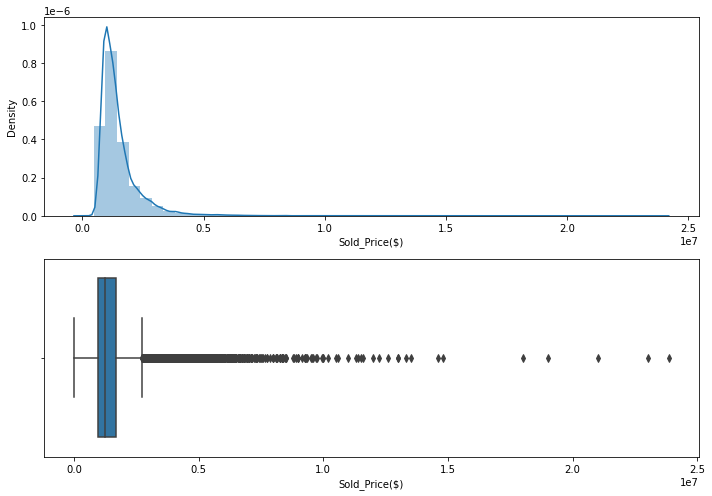

In [8]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(exp_df['Sold_Price($)'])
fig.add_subplot(2,1,2)
sns.boxplot(exp_df['Sold_Price($)'])
plt.tight_layout()

/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

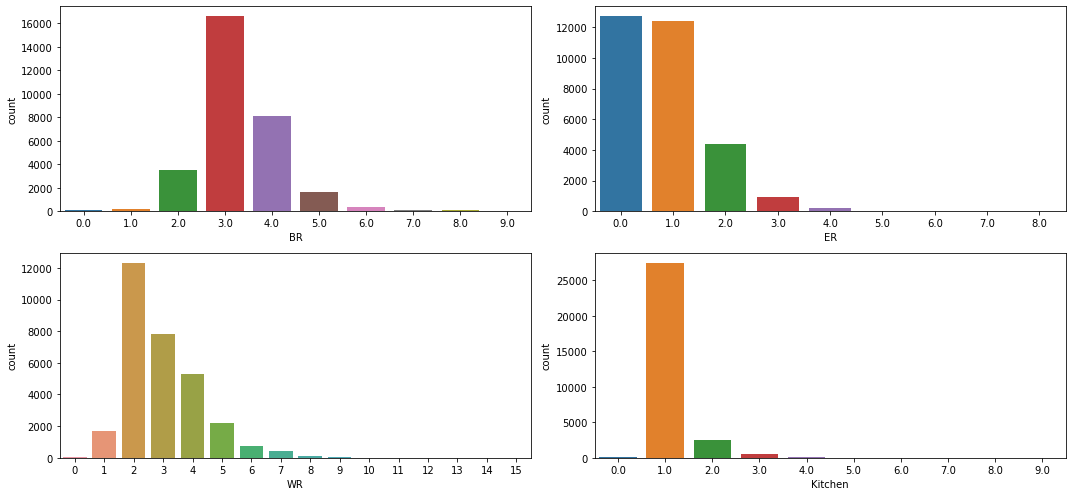

In [9]:
# plotting bedrooms, kitchens, extra rooms and wash rooms according to count of houses
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(exp_df['BR'])
fig.add_subplot(2,2,2)
sns.countplot(exp_df['ER'])
fig.add_subplot(2,2,3)
sns.countplot(exp_df['WR'])
fig.add_subplot(2,2,4)
sns.countplot(exp_df['Kitchen'])
plt.tight_layout()

/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


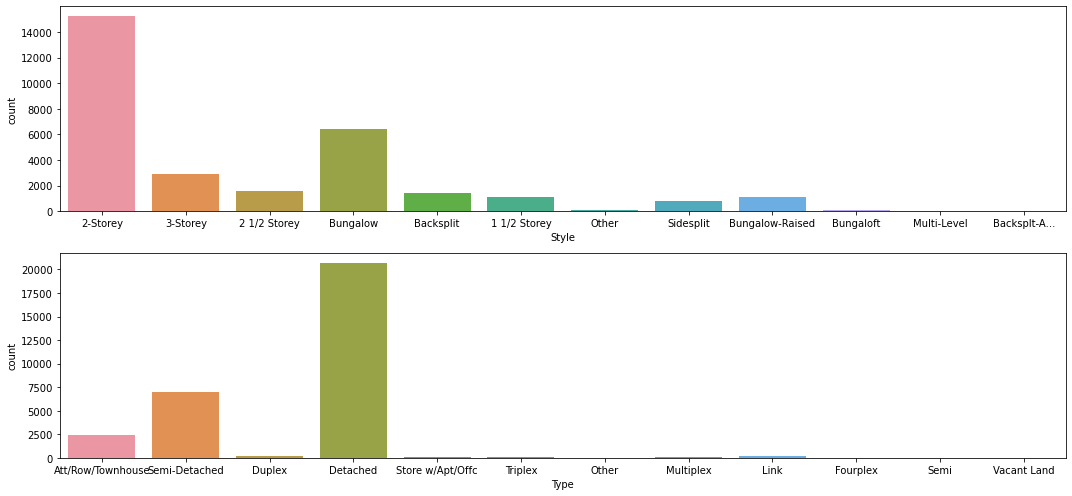

In [10]:
# Plotting counts of styles and types
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,1,1)
sns.countplot(exp_df['Style'])
fig.add_subplot(2,1,2)
sns.countplot(exp_df['Type'])
plt.tight_layout()

/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

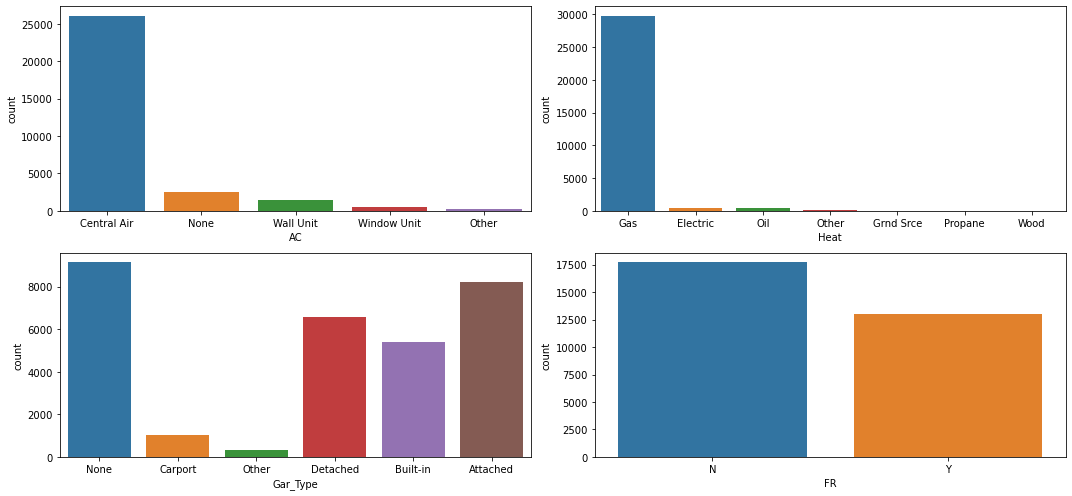

In [11]:
# Plotting counts ac, heat and garage type and if Famil room exists
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(exp_df['AC'])
fig.add_subplot(2,2,2)
sns.countplot(exp_df['Heat'])
fig.add_subplot(2,2,3)
sns.countplot(exp_df['Gar_Type'])
fig.add_subplot(2,2,4)
sns.countplot(exp_df['FR'])
plt.tight_layout()

<AxesSubplot:title={'center':'Selling Price according to Contract Dates'}, xlabel='Contract Date', ylabel='Selling Price'>

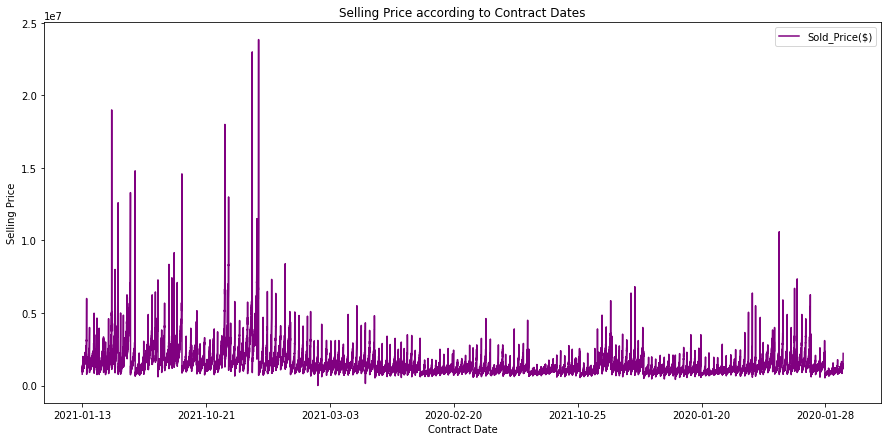

In [17]:
# Plotting price vs features
exp_df.plot(x='Contract_Date', y ='Sold_Price($)', figsize =(15,7), title ='Selling Price according to Contract Dates', xlabel = 'Contract Date', ylabel ='Selling Price', color = 'purple')

In [20]:
# average Prices according to features
exp_df.groupby(["BR"]).mean()["Sold_Price($)"]

BR
0.0    1.870556e+06
1.0    9.992116e+05
2.0    1.100633e+06
3.0    1.279634e+06
4.0    1.859942e+06
5.0    2.516545e+06
6.0    2.555058e+06
7.0    2.428115e+06
8.0    2.572514e+06
9.0    2.684413e+06
Name: Sold_Price($), dtype: float64

In [21]:
exp_df.groupby(["WR"]).mean()["Sold_Price($)"]

WR
0     2.033410e+06
1     1.043299e+06
2     1.163934e+06
3     1.363856e+06
4     1.733080e+06
5     2.450635e+06
6     2.948865e+06
7     3.623988e+06
8     4.317660e+06
9     6.422211e+06
10    4.501611e+06
11    5.670101e+06
12    5.263333e+06
13    1.290000e+07
14    6.115000e+06
15    7.479500e+06
Name: Sold_Price($), dtype: float64

In [22]:
exp_df.groupby(["ER"]).mean()["Sold_Price($)"]

ER
0.0    1.396732e+06
1.0    1.624490e+06
2.0    1.476245e+06
3.0    1.374550e+06
4.0    1.618508e+06
5.0    1.756574e+06
6.0    2.854545e+06
7.0    1.552825e+06
8.0    2.905000e+06
Name: Sold_Price($), dtype: float64

In [23]:
exp_df.groupby(["FR"]).mean()["Sold_Price($)"]

FR
N    1.250393e+06
Y    1.844213e+06
Name: Sold_Price($), dtype: float64

In [24]:
exp_df.groupby(["Kitchen"]).mean()["Sold_Price($)"]

Kitchen
0.0    1.922108e+06
1.0    1.500228e+06
2.0    1.403748e+06
3.0    1.712356e+06
4.0    2.211764e+06
5.0    2.563227e+06
6.0    2.666288e+06
7.0    2.205917e+06
8.0    3.371656e+06
9.0    3.046250e+06
Name: Sold_Price($), dtype: float64

In [25]:
exp_df.groupby(["Gar_Type"]).mean()["Sold_Price($)"]

Gar_Type
Attached    1.470819e+06
Built-in    1.910682e+06
Carport     1.183159e+06
Detached    1.474331e+06
None        1.347291e+06
Other       1.404705e+06
Name: Sold_Price($), dtype: float64

In [26]:
exp_df.groupby(["Heat"]).mean()["Sold_Price($)"]

Heat
Electric     1.334269e+06
Gas          1.505237e+06
Grnd Srce    3.177992e+06
Oil          1.275490e+06
Other        1.630947e+06
Propane      1.200000e+06
Wood         1.296728e+06
Name: Sold_Price($), dtype: float64

In [27]:
exp_df.groupby(["AC"]).mean()["Sold_Price($)"]

AC
Central Air    1.513155e+06
None           1.286457e+06
Other          1.807320e+06
Wall Unit      1.669040e+06
Window Unit    1.321409e+06
Name: Sold_Price($), dtype: float64

In [28]:
exp_df.groupby(["Type"]).mean()["Sold_Price($)"]

Type
Att/Row/Townhouse    1.172969e+06
Detached             1.621732e+06
Duplex               1.607485e+06
Fourplex             2.050352e+06
Link                 9.876958e+05
Multiplex            2.772008e+06
Other                2.176091e+06
Semi                 1.450000e+06
Semi-Detached        1.251453e+06
Store w/Apt/Offc     1.432706e+06
Triplex              1.628706e+06
Vacant Land          1.049995e+06
Name: Sold_Price($), dtype: float64

In [29]:
exp_df.groupby(["Style"]).mean()["Sold_Price($)"]

Style
1 1/2 Storey       1.201245e+06
2 1/2 Storey       1.986681e+06
2-Storey           1.629456e+06
3-Storey           1.854262e+06
Backsplit          1.166243e+06
Backsplt-A...      1.205000e+06
Bungaloft          1.220307e+06
Bungalow           1.119971e+06
Bungalow-Raised    1.130534e+06
Multi-Level        2.030000e+06
Other              1.786648e+06
Sidesplit          1.402856e+06
Name: Sold_Price($), dtype: float64

In [30]:
exp_df.groupby(["Municipality"]).mean()["Sold_Price($)"]

Municipality
Toronto C00    7.800000e+05
Toronto C01    1.701418e+06
Toronto C02    2.422918e+06
Toronto C03    2.031312e+06
Toronto C04    2.476018e+06
Toronto C06    1.599797e+06
Toronto C07    1.762755e+06
Toronto C08    1.566788e+06
Toronto C09    3.663374e+06
Toronto C10    1.899077e+06
Toronto C11    2.180700e+06
Toronto C12    3.986045e+06
Toronto C13    1.706585e+06
Toronto C14    2.181034e+06
Toronto C15    1.541356e+06
Toronto E01    1.382839e+06
Toronto E02    1.503525e+06
Toronto E03    1.271646e+06
Toronto E04    1.011135e+06
Toronto E05    1.161252e+06
Toronto E06    1.160547e+06
Toronto E07    1.086651e+06
Toronto E08    1.219745e+06
Toronto E09    9.779303e+05
Toronto E10    1.101861e+06
Toronto E11    9.343084e+05
Toronto W01    1.850098e+06
Toronto W02    1.456323e+06
Toronto W03    1.020027e+06
Toronto W04    1.108075e+06
Toronto W05    9.906750e+05
Toronto W06    1.291410e+06
Toronto W07    1.615211e+06
Toronto W08    1.722662e+06
Toronto W09    1.243138e+06
Toronto

In [31]:
exp_df.groupby(["Community"]).mean()["Sold_Price($)"]

Community
Agincourt North                 1.053070e+06
Agincourt South-Malvern West    1.173628e+06
Alderwood                       1.263316e+06
Annex                           2.516080e+06
Banbury-Don Mills               2.387883e+06
                                    ...     
Wychwood                        1.597694e+06
Yonge-Eglinton                  2.127079e+06
Yonge-St. Clair                 2.845841e+06
York University Heights         9.948220e+05
Yorkdale-Glen Park              1.461823e+06
Name: Sold_Price($), Length: 142, dtype: float64

In [37]:
x1= exp_df.groupby(["Type"]).mean()
x2 = exp_df.groupby(["Style"]).mean()
x1.drop(['Lat', 'Lng'], inplace=True, axis =1)
x2.drop(['Lat', 'Lng'], inplace=True, axis =1)

In [38]:
x1

,List_Price($),Sold_Price($),BR,ER,WR,Kitchen
Type,,,,,,
Att/Row/Townhouse,1.094489e+06,1.172969e+06,3.058679,0.456299,2.884284,1.089865
Detached,1.560759e+06,1.621732e+06,3.343519,0.913637,3.087762,1.096548
Duplex,1.566668e+06,1.607485e+06,4.095238,0.878307,3.285714,2.095238
Fourplex,2.009173e+06,2.050352e+06,6.384615,0.807692,4.576923,3.923077
Link,9.226016e+05,9.876958e+05,3.337662,0.883117,3.136364,1.038961
Multiplex,2.859444e+06,2.772008e+06,6.523077,2.261538,6.292308,4.876923
Other,2.145782e+06,2.176091e+06,3.636364,0.727273,3.363636,1.818182
Semi,1.488000e+06,1.450000e+06,3.000000,0.000000,3.000000,1.000000
Semi-Detached,1.140721e+06,1.251453e+06,3.190866,0.626598,2.560103,1.163579


In [41]:
x2

,List_Price($),Sold_Price($),BR,ER,WR,Kitchen
Style,,,,,,
1 1/2 Storey,1.130132e+06,1.201245e+06,2.936697,0.691743,2.296330,1.064220
2 1/2 Storey,1.893841e+06,1.986681e+06,4.049305,0.662453,3.300253,1.445638
2-Storey,1.557113e+06,1.629456e+06,3.409333,0.704535,3.262191,1.114852
3-Storey,1.802330e+06,1.854262e+06,3.727711,0.617212,3.731842,1.245095
Backsplit,1.099051e+06,1.166243e+06,3.653515,0.729555,2.714491,1.121951
Backsplt-A...,1.250000e+06,1.205000e+06,3.000000,2.000000,3.000000,2.000000
Bungaloft,1.141496e+06,1.220307e+06,2.750000,1.166667,2.450000,1.133333
Bungalow,1.038265e+06,1.119971e+06,2.712601,1.199565,2.132526,1.082868
Bungalow-Raised,1.059974e+06,1.130534e+06,3.020591,1.153089,2.342883,1.126231


In [42]:
# check correlation
exp_df.corr()['Sold_Price($)'].sort_values(ascending=False)

Sold_Price($)    1.000000
List_Price($)    0.984773
WR               0.598249
BR               0.395104
ER               0.049102
Kitchen          0.048520
Lng              0.006346
Lat             -0.005482
Name: Sold_Price($), dtype: float64

<AxesSubplot:xlabel='Sold_Price($)', ylabel='Kitchen'>

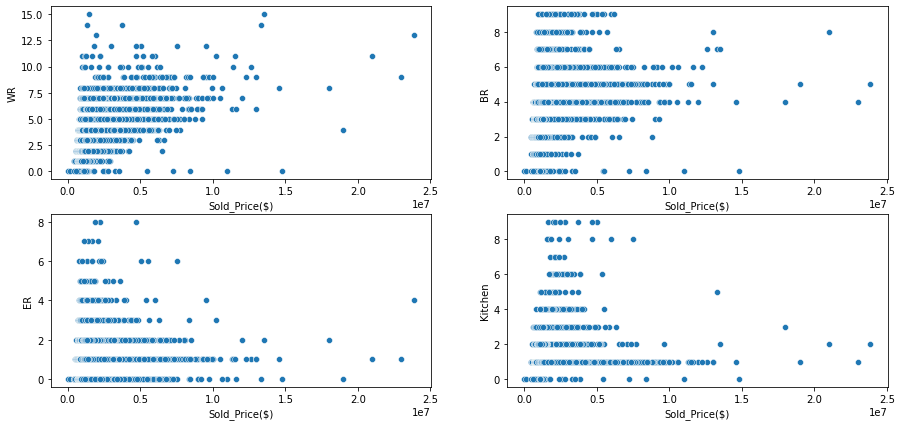

In [49]:
## numeric features with higher correlation
fig =plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.scatterplot(x='Sold_Price($)',y='WR',data=exp_df)
fig.add_subplot(2,2,2)
sns.scatterplot(x='Sold_Price($)',y='BR',data=exp_df)
fig.add_subplot(2,2,3)
sns.scatterplot(x='Sold_Price($)',y='ER',data=exp_df)
fig.add_subplot(2,2,4)
sns.scatterplot(x='Sold_Price($)',y='Kitchen',data=exp_df)

In [104]:
exp_df['Lat'].describe()

count    30718.000000
mean        43.710383
std          0.506471
min        -37.817468
25%         43.672097
50%         43.702479
75%         43.753068
max         64.630916
Name: Lat, dtype: float64

In [105]:
exp_df['Lng'].describe()

count    30718.000000
mean       -79.358470
std          1.848752
min        -80.600331
25%        -79.466836
50%        -79.398206
75%        -79.307248
max        144.951680
Name: Lng, dtype: float64

# Create Neural Network Model

In [14]:
# Read in table of data from PGADMIN or connected database

from sqlalchemy import create_engine
#import library psycopyg2
import psycopg2
#import library sqlio
import pandas.io.sql as sqlio

# Postgres username, password, and database name
POSTGRES_ADDRESS = 'db1-realestate-prediction.cc3utfionj0h.us-east-2.rds.amazonaws.com' ## INSERT YOUR DB ADDRESS
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'realestate'
POSTGRES_PASSWORD = '12345678'
POSTGRES_DBNAME = 'postgres'

#create database connection variable 
conn = psycopg2.connect(user=POSTGRES_USERNAME, password=POSTGRES_PASSWORD, host=POSTGRES_ADDRESS, database=POSTGRES_DBNAME)

In [17]:
df_dbase = sqlio.read_sql_query('''SELECT * FROM public."REALESTATE";''', conn)
df_dbase

,id,municipality,community,list_price,sold_price,type,style,br,er,wr,fr,kitchen,gar_type,ac,heat,contract_date,mls_id,address,lat,lng
0,0,Toronto C00,Niagara,"$699,999.00","$780,000.00",Att/Row/Townhouse,2-Storey,3.0,0.0,1.0,N,1.0,None,Central Air,Gas,2021-01-13,C5083064,"793 Adelaide St W, Toronto",43.643807,-79.409426
1,1,Toronto C01,University,"$799,000.00","$1,225,000.00",Semi-Detached,2-Storey,3.0,0.0,2.0,Y,2.0,None,None,Gas,2020-05-29,C4773721,"75 Major St, Toronto",43.659648,-79.403456
2,2,Toronto C01,University,"$799,000.00","$1,203,000.00",Semi-Detached,2-Storey,3.0,1.0,3.0,N,2.0,None,None,Gas,2020-11-05,C4979474,"81 Major St, Toronto",43.659777,-79.403505
3,3,Toronto C01,Niagara,"$899,000.00","$959,000.00",Att/Row/Townhouse,2-Storey,3.0,0.0,2.0,Y,1.0,None,Central Air,Gas,2020-09-22,C4923168,"784 Adelaide St W, Toronto",43.644117,-79.409249
4,4,Toronto C01,Niagara,"$899,000.00","$1,073,000.00",Att/Row/Townhouse,2-Storey,2.0,0.0,2.0,N,1.0,None,Central Air,Gas,2020-11-10,C4985281,"16 Whitaker Ave, Toronto",43.643948,-79.406457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31857,31857,Toronto W10,Thistletown-Beaumonde Heights,"$1,299,900.00","$1,300,000.00",Detached,1 1/2 Storey,4.0,2.0,3.0,N,1.0,Attached,Central Air,Gas,2021-10-03,W5391840,"8 Wardlaw Cres, Toronto",43.739635,-79.565621
31858,31858,Toronto W10,Thistletown-Beaumonde Heights,"$1,349,000.00","$1,365,000.00",Detached,Backsplit,4.0,1.0,2.0,N,1.0,Attached,Central Air,Gas,2021-11-12,W5430335,"156 Thistle Down Blvd, Toronto",43.740987,-79.550545
31859,31859,Toronto W10,West Humber-Clairville,"$1,599,900.00","$1,600,000.00",Detached,2-Storey,4.0,0.0,4.0,Y,1.0,Attached,Central Air,Gas,2021-12-17,W5458498,"11 Woodlot Cres, Toronto",43.732902,-79.614069
31860,31860,Toronto W10,Thistletown-Beaumonde Heights,"$1,750,000.00","$1,850,000.00",Detached,Backsplit,5.0,0.0,4.0,Y,1.0,Attached,Central Air,Gas,2021-12-02,W5447590,"16 Forest Path Crt, Toronto",43.741928,-79.555623


In [3]:
# Read in clean complete dataset with lat/lng
model_df = pd.read_csv('Resources_Cleaned/Inactive_Listings.csv')
model_df

,Unnamed: 0,Municipality,Community,List_Price($),Sold_Price($),Type,Style,BR,ER,WR,FR,Kitchen,Gar_Type,AC,Heat,Contract_Date,MLS_ID,Address,Lat,Lng
0,0,Toronto C00,Niagara,"$699,999","$780,000",Att/Row/Townhouse,2-Storey,3.0,0.0,1,N,1.0,None,Central Air,Gas,2021-01-13,C5083064,"793 Adelaide St W, Toronto",43.643807,-79.409426
1,1,Toronto C01,University,"$799,000","$1,225,000",Semi-Detached,2-Storey,3.0,0.0,2,Y,2.0,None,None,Gas,2020-05-29,C4773721,"75 Major St, Toronto",43.659648,-79.403456
2,2,Toronto C01,University,"$799,000","$1,203,000",Semi-Detached,2-Storey,3.0,1.0,3,N,2.0,None,None,Gas,2020-11-05,C4979474,"81 Major St, Toronto",43.659777,-79.403505
3,3,Toronto C01,Niagara,"$899,000","$959,000",Att/Row/Townhouse,2-Storey,3.0,0.0,2,Y,1.0,None,Central Air,Gas,2020-09-22,C4923168,"784 Adelaide St W, Toronto",43.644117,-79.409249
4,4,Toronto C01,Niagara,"$899,000","$1,073,000",Att/Row/Townhouse,2-Storey,2.0,0.0,2,N,1.0,None,Central Air,Gas,2020-11-10,C4985281,"16 Whitaker Ave, Toronto",43.643948,-79.406457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31857,31857,Toronto W10,Thistletown-Beaumonde Heights,"$1,299,900","$1,300,000",Detached,1 1/2 Storey,4.0,2.0,3,N,1.0,Attached,Central Air,Gas,2021-10-03,W5391840,"8 Wardlaw Cres, Toronto",43.739635,-79.565621
31858,31858,Toronto W10,Thistletown-Beaumonde Heights,"$1,349,000","$1,365,000",Detached,Backsplit,4.0,1.0,2,N,1.0,Attached,Central Air,Gas,2021-11-12,W5430335,"156 Thistle Down Blvd, Toronto",43.740987,-79.550545
31859,31859,Toronto W10,West Humber-Clairville,"$1,599,900","$1,600,000",Detached,2-Storey,4.0,0.0,4,Y,1.0,Attached,Central Air,Gas,2021-12-17,W5458498,"11 Woodlot Cres, Toronto",43.732902,-79.614069
31860,31860,Toronto W10,Thistletown-Beaumonde Heights,"$1,750,000","$1,850,000",Detached,Backsplit,5.0,0.0,4,Y,1.0,Attached,Central Air,Gas,2021-12-02,W5447590,"16 Forest Path Crt, Toronto",43.741928,-79.555623


In [4]:
model_df['List_Price($)'] = model_df['List_Price($)'].replace('[\$,]', '', regex=True).astype(float)
model_df['Sold_Price($)'] = model_df['Sold_Price($)'].replace('[\$,]', '', regex=True).astype(float)
model_df.drop(['Unnamed: 0'], axis=1, inplace = True)
model_df=model_df.dropna()
model_df.isnull().sum()

Municipality     0
Community        0
List_Price($)    0
Sold_Price($)    0
Type             0
Style            0
BR               0
ER               0
WR               0
FR               0
Kitchen          0
Gar_Type         0
AC               0
Heat             0
Contract_Date    0
MLS_ID           0
Address          0
Lat              0
Lng              0
dtype: int64

In [5]:
model_df["Lng"] = pd.to_numeric(model_df["Lng"])
model_df["Lat"] = pd.to_numeric(model_df["Lat"])
model_df.dtypes

/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Municipality      object
Community         object
List_Price($)    float64
Sold_Price($)    float64
Type              object
Style             object
BR               float64
ER               float64
WR                 int64
FR                object
Kitchen          float64
Gar_Type          object
AC                object
Heat              object
Contract_Date     object
MLS_ID            object
Address           object
Lat              float64
Lng              float64
dtype: object

In [7]:
model_df['Contract_Date'] = pd.to_datetime(model_df['Contract_Date'])

/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
import datetime
import time
z=[]
for i in model_df['Contract_Date']:
    y = time.mktime(i.timetuple())
    z.append(y)
    
model_df['Contract_Date']=z
model_df

/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Municipality,Community,List_Price($),Sold_Price($),Type,Style,BR,ER,WR,FR,Kitchen,Gar_Type,AC,Heat,Contract_Date,MLS_ID,Address,Lat,Lng
0,Toronto C00,Niagara,699999.0,780000.0,Att/Row/Townhouse,2-Storey,3.0,0.0,1,N,1.0,None,Central Air,Gas,1.610514e+09,C5083064,"793 Adelaide St W, Toronto",43.643807,-79.409426
1,Toronto C01,University,799000.0,1225000.0,Semi-Detached,2-Storey,3.0,0.0,2,Y,2.0,None,None,Gas,1.590725e+09,C4773721,"75 Major St, Toronto",43.659648,-79.403456
2,Toronto C01,University,799000.0,1203000.0,Semi-Detached,2-Storey,3.0,1.0,3,N,2.0,None,None,Gas,1.604552e+09,C4979474,"81 Major St, Toronto",43.659777,-79.403505
3,Toronto C01,Niagara,899000.0,959000.0,Att/Row/Townhouse,2-Storey,3.0,0.0,2,Y,1.0,None,Central Air,Gas,1.600747e+09,C4923168,"784 Adelaide St W, Toronto",43.644117,-79.409249
4,Toronto C01,Niagara,899000.0,1073000.0,Att/Row/Townhouse,2-Storey,2.0,0.0,2,N,1.0,None,Central Air,Gas,1.604984e+09,C4985281,"16 Whitaker Ave, Toronto",43.643948,-79.406457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31857,Toronto W10,Thistletown-Beaumonde Heights,1299900.0,1300000.0,Detached,1 1/2 Storey,4.0,2.0,3,N,1.0,Attached,Central Air,Gas,1.633234e+09,W5391840,"8 Wardlaw Cres, Toronto",43.739635,-79.565621
31858,Toronto W10,Thistletown-Beaumonde Heights,1349000.0,1365000.0,Detached,Backsplit,4.0,1.0,2,N,1.0,Attached,Central Air,Gas,1.636693e+09,W5430335,"156 Thistle Down Blvd, Toronto",43.740987,-79.550545
31859,Toronto W10,West Humber-Clairville,1599900.0,1600000.0,Detached,2-Storey,4.0,0.0,4,Y,1.0,Attached,Central Air,Gas,1.639717e+09,W5458498,"11 Woodlot Cres, Toronto",43.732902,-79.614069
31860,Toronto W10,Thistletown-Beaumonde Heights,1750000.0,1850000.0,Detached,Backsplit,5.0,0.0,4,Y,1.0,Attached,Central Air,Gas,1.638421e+09,W5447590,"16 Forest Path Crt, Toronto",43.741928,-79.555623


In [9]:
model_df.drop(['MLS_ID', 'Address'], inplace=True, axis=1)

/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
cat = model_df.dtypes[model_df.dtypes == "object"].index.tolist()
cat

['Municipality', 'Community', 'Type', 'Style', 'FR', 'Gar_Type', 'AC', 'Heat']

In [12]:
# define ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
# transform data
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(model_df[cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = model_df[cat].columns
encode_df.head()

,Municipality,Community,Type,Style,FR,Gar_Type,AC,Heat
0,0.0,91.0,0.0,2.0,0.0,4.0,0.0,1.0
1,1.0,121.0,8.0,2.0,1.0,4.0,1.0,1.0
2,1.0,121.0,8.0,2.0,0.0,4.0,1.0,1.0
3,1.0,91.0,0.0,2.0,1.0,4.0,0.0,1.0
4,1.0,91.0,0.0,2.0,0.0,4.0,0.0,1.0


In [13]:
final_df = model_df.merge(encode_df,left_index=True, right_index=True)
final_df

,Municipality_x,Community_x,List_Price($),Sold_Price($),Type_x,Style_x,BR,ER,WR,FR_x,...,Lat,Lng,Municipality_y,Community_y,Type_y,Style_y,FR_y,Gar_Type_y,AC_y,Heat_y
0,Toronto C00,Niagara,699999.0,780000.0,Att/Row/Townhouse,2-Storey,3.0,0.0,1,N,...,43.643807,-79.409426,0.0,91.0,0.0,2.0,0.0,4.0,0.0,1.0
1,Toronto C01,University,799000.0,1225000.0,Semi-Detached,2-Storey,3.0,0.0,2,Y,...,43.659648,-79.403456,1.0,121.0,8.0,2.0,1.0,4.0,1.0,1.0
2,Toronto C01,University,799000.0,1203000.0,Semi-Detached,2-Storey,3.0,1.0,3,N,...,43.659777,-79.403505,1.0,121.0,8.0,2.0,0.0,4.0,1.0,1.0
3,Toronto C01,Niagara,899000.0,959000.0,Att/Row/Townhouse,2-Storey,3.0,0.0,2,Y,...,43.644117,-79.409249,1.0,91.0,0.0,2.0,1.0,4.0,0.0,1.0
4,Toronto C01,Niagara,899000.0,1073000.0,Att/Row/Townhouse,2-Storey,2.0,0.0,2,N,...,43.643948,-79.406457,1.0,91.0,0.0,2.0,0.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30712,Toronto W09,Willowridge-Martingrove-Richview,899900.0,975000.0,Detached,Sidesplit,3.0,0.0,2,N,...,43.683167,-79.560407,35.0,126.0,1.0,2.0,1.0,0.0,0.0,1.0
30713,Toronto W09,Willowridge-Martingrove-Richview,899900.0,975000.0,Detached,Sidesplit,4.0,2.0,2,N,...,43.690863,-79.558152,35.0,119.0,1.0,0.0,0.0,0.0,0.0,1.0
30714,Toronto W09,Willowridge-Martingrove-Richview,899900.0,950000.0,Detached,Bungalow,3.0,0.0,1,N,...,43.681811,-79.561523,35.0,119.0,1.0,4.0,0.0,0.0,0.0,1.0
30716,Toronto W09,Willowridge-Martingrove-Richview,899900.0,985000.0,Detached,Bungalow,3.0,1.0,2,N,...,43.689687,-79.560456,35.0,119.0,1.0,4.0,1.0,0.0,0.0,1.0


In [16]:
final_df.columns

Index(['Municipality_x', 'Community_x', 'List_Price($)', 'Sold_Price($)',
       'Type_x', 'Style_x', 'BR', 'ER', 'WR', 'FR_x', 'Kitchen', 'Gar_Type_x',
       'AC_x', 'Heat_x', 'Contract_Date', 'Lat', 'Lng', 'Municipality_y',
       'Community_y', 'Type_y', 'Style_y', 'FR_y', 'Gar_Type_y', 'AC_y',
       'Heat_y'],
      dtype='object')

In [18]:
final_df = final_df.drop(['Municipality_x', 'Community_x', 'Type_x', 'Style_x', 'FR_x', 'Gar_Type_x', 'AC_x', 'Heat_x'] ,1)



/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [19]:
final_df

,List_Price($),Sold_Price($),BR,ER,WR,Kitchen,Contract_Date,Lat,Lng,Municipality_y,Community_y,Type_y,Style_y,FR_y,Gar_Type_y,AC_y,Heat_y
0,699999.0,780000.0,3.0,0.0,1,1.0,1.610514e+09,43.643807,-79.409426,0.0,91.0,0.0,2.0,0.0,4.0,0.0,1.0
1,799000.0,1225000.0,3.0,0.0,2,2.0,1.590725e+09,43.659648,-79.403456,1.0,121.0,8.0,2.0,1.0,4.0,1.0,1.0
2,799000.0,1203000.0,3.0,1.0,3,2.0,1.604552e+09,43.659777,-79.403505,1.0,121.0,8.0,2.0,0.0,4.0,1.0,1.0
3,899000.0,959000.0,3.0,0.0,2,1.0,1.600747e+09,43.644117,-79.409249,1.0,91.0,0.0,2.0,1.0,4.0,0.0,1.0
4,899000.0,1073000.0,2.0,0.0,2,1.0,1.604984e+09,43.643948,-79.406457,1.0,91.0,0.0,2.0,0.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30712,899900.0,975000.0,3.0,0.0,2,1.0,1.603685e+09,43.683167,-79.560407,35.0,126.0,1.0,2.0,1.0,0.0,0.0,1.0
30713,899900.0,975000.0,4.0,2.0,2,1.0,1.604898e+09,43.690863,-79.558152,35.0,119.0,1.0,0.0,0.0,0.0,0.0,1.0
30714,899900.0,950000.0,3.0,0.0,1,1.0,1.605071e+09,43.681811,-79.561523,35.0,119.0,1.0,4.0,0.0,0.0,0.0,1.0
30716,899900.0,985000.0,3.0,1.0,2,1.0,1.612156e+09,43.689687,-79.560456,35.0,119.0,1.0,4.0,1.0,0.0,0.0,1.0


In [20]:
# Split our preprocessed data into our features and target arrays
y = final_df["Sold_Price($)"].values
X = final_df.drop(["Sold_Price($)"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Fit/Train Model on training data for inactive/sold houses

In [22]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train_scaled, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([ 9.09271144e+05,  1.23482561e+04, -5.94543224e+03,  7.99364172e+03,
       -1.20826196e+04,  4.17743739e+04, -3.10449918e+03, -3.18473938e+03,
       -1.99788862e+04,  1.65092116e+03,  1.51305295e+03, -5.03043931e+03,
       -3.44150662e+03,  1.06622213e+04,  9.47487277e+02,  1.89036802e+02])

In [23]:
y_predd = regressor.predict(X_test_scaled)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Predicted
0,1110000.0,1.145430e+06
1,760000.0,8.105215e+05
2,3149999.0,2.854585e+06
3,4850000.0,5.030945e+06
4,1300000.0,1.145267e+06
5,1250000.0,1.233565e+06
6,3150000.0,2.972766e+06
7,2800000.0,2.674277e+06
8,2820000.0,2.776142e+06
9,1375000.0,1.286633e+06


In [24]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))

Mean Absolute Error: 112105.32
Mean Squared Error:22751662974.16
Root Mean Squared Error:150836.54
Variance score is: 0.97


In [25]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train_scaled,y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test_scaled, y_test)))

Linear Regression Model:
Train Score 0.97
Test Score 0.97


# Model predicts on testing data for active listings

In [34]:
df2 = pd.read_csv('Resources_Uncleaned/Active_Listings_Raw.csv')
df2

,LSC,EC,St#,Street Name,Abbr,Dir,Municipality,Community,List Price,Type,...,Fam,Kit,Gar Type,(A/C),Heat,Contract Date,List Brokerage,Co-Op Brokerage,CB Com,MLS #
0,New,NaN,8 Virgilwood Dr,NaN,NaN,NaN,Toronto C07,Westminster-Branson,"$989,000",Semi-Detached,...,N,2.0,None,Central Air,Gas,12/17/2021,RE/MAX PREMIER I...,416-987-8000,2.25%,C5457674
1,New,NaN,213 Northcliffe Blvd,NaN,NaN,NaN,Toronto C03,Oakwood-Vaughan,"$999,900",Detached,...,N,1.0,Detached,Window Unit,Gas,1/9/2022,RE/MAX REALTRON ...,905-470-9800,2.50%,C5467990
2,New,NaN,144 Winnett Ave,NaN,NaN,NaN,Toronto C03,Humewood-Cedarvale,"$1,038,000",Semi-Detached,...,N,1.0,None,Central Air,Gas,1/10/2022,ROYAL LEPAGE/J &...,416-489-2121,2.5% + H.S...,C5468205
3,New,NaN,357 Oakwood Ave,NaN,NaN,NaN,Toronto C03,Oakwood-Vaughan,"$1,145,000",Store w/Apt/Offc,...,N,3.0,None,Wall Unit,Gas,10/13/2021,FOREST HILL REAL...,905-237-7427,2.5%+Hst,C5400499
4,New,NaN,82 Petman Ave,NaN,NaN,NaN,Toronto C10,Mount Pleasant East,"$1,149,000",Detached,...,N,1.0,None,Central Air,Gas,1/11/2022,CHESTNUT PARK RE...,416-925-9191,2.5% + Hst,C5469304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,New,NaN,9 Amaron Ave,NaN,NaN,NaN,Toronto W10,Thistletown-Beaumonde Heights,"$1,049,900",Detached,...,Y,1.0,Detached,Central Air,Gas,1/10/2022,RE/MAX PREMIER I...,416-743-2000,2.5 %,W5468541
558,New,NaN,35 Chilcot Ave,NaN,NaN,NaN,Toronto W10,Elms-Old Rexdale,"$1,199,999",Detached,...,Y,1.0,Detached,Central Air,Gas,11/27/2021,HOMELIFE LANDMAR...,905-305-1600,2.50%,W5443512
559,New,NaN,145 Silverstone Dr,NaN,NaN,NaN,Toronto W10,Mount Olive-Silverstone-Jamestown,"$1,231,000",Detached,...,Y,1.0,Detached,Central Air,Gas,1/7/2022,HOMELIFE/MIRACLE...,416-747-9777,2.5%-199Mf,W5467290
560,New,NaN,107 Mount Olive Dr,NaN,NaN,NaN,Toronto W10,Mount Olive-Silverstone-Jamestown,"$1,279,000",Detached,...,N,1.0,Attached,Central Air,Gas,1/8/2022,RE/MAX COMMUNITY...,416-287-2222,2.50%,W5467611


In [35]:
# Check for null values within the dataframe
df2.isnull().sum()

LSC                  0
EC                 562
St#                  0
Street Name        562
Abbr               562
Dir                562
Municipality         0
Community            0
List Price           0
Type                 0
Style               10
BR                  10
(+)                214
Wr                   0
Fam                 14
Kit                 10
Gar Type             7
(A/C)                9
Heat                 9
Contract Date        0
List Brokerage       0
Co-Op Brokerage      0
CB Com               0
MLS #                0
dtype: int64

In [37]:
# Convert all NaNs in the Extra Room column / (+) to 0s
df2['(+)'] = df2['(+)'].fillna(0)

# drop LSC, EC, Street Names, Abbr, Dir, List/Coop Brokerage and Sold Date.
# We remove sold date as feature as sold date does not exist in active listings dataset(the data we want predictions on)
df2.drop(['LSC', 'EC', 'Street Name', 'Abbr', 'Dir', 'List Brokerage', 'Co-Op Brokerage', 'CB Com', 'MLS #'], axis=1, inplace=True)

In [38]:
df2.isnull().sum()

St#                0
Municipality       0
Community          0
List Price         0
Type               0
Style             10
BR                10
(+)                0
Wr                 0
Fam               14
Kit               10
Gar Type           7
(A/C)              9
Heat               9
Contract Date      0
dtype: int64

In [39]:
df2 = df2.dropna()
df2.isnull().sum()

St#               0
Municipality      0
Community         0
List Price        0
Type              0
Style             0
BR                0
(+)               0
Wr                0
Fam               0
Kit               0
Gar Type          0
(A/C)             0
Heat              0
Contract Date     0
dtype: int64

In [40]:
df2

,St#,Municipality,Community,List Price,Type,Style,BR,(+),Wr,Fam,Kit,Gar Type,(A/C),Heat,Contract Date
0,8 Virgilwood Dr,Toronto C07,Westminster-Branson,"$989,000",Semi-Detached,Bungalow,4.0,2.0,2,N,2.0,None,Central Air,Gas,12/17/2021
1,213 Northcliffe Blvd,Toronto C03,Oakwood-Vaughan,"$999,900",Detached,2-Storey,3.0,0.0,2,N,1.0,Detached,Window Unit,Gas,1/9/2022
2,144 Winnett Ave,Toronto C03,Humewood-Cedarvale,"$1,038,000",Semi-Detached,2-Storey,3.0,0.0,3,N,1.0,None,Central Air,Gas,1/10/2022
3,357 Oakwood Ave,Toronto C03,Oakwood-Vaughan,"$1,145,000",Store w/Apt/Offc,2-Storey,3.0,0.0,3,N,3.0,None,Wall Unit,Gas,10/13/2021
4,82 Petman Ave,Toronto C10,Mount Pleasant East,"$1,149,000",Detached,2-Storey,3.0,0.0,2,N,1.0,None,Central Air,Gas,1/11/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,9 Amaron Ave,Toronto W10,Thistletown-Beaumonde Heights,"$1,049,900",Detached,Bungalow,3.0,1.0,3,Y,1.0,Detached,Central Air,Gas,1/10/2022
558,35 Chilcot Ave,Toronto W10,Elms-Old Rexdale,"$1,199,999",Detached,1 1/2 Storey,3.0,2.0,2,Y,1.0,Detached,Central Air,Gas,11/27/2021
559,145 Silverstone Dr,Toronto W10,Mount Olive-Silverstone-Jamestown,"$1,231,000",Detached,Bungalow,4.0,2.0,2,Y,1.0,Detached,Central Air,Gas,1/7/2022
560,107 Mount Olive Dr,Toronto W10,Mount Olive-Silverstone-Jamestown,"$1,279,000",Detached,2-Storey,4.0,1.0,3,N,1.0,Attached,Central Air,Gas,1/8/2022


In [42]:
# rename some columns
df2 = df2.rename(columns={'St#': 'Address', '(+)':'ER', 'Wr': 'WR', 'Fam': 'FR', 'Kit':'Kitchen', 'Contract Date ': 'Contract_Date', 'Gar Type': 'Gar_Type', '(A/C)':'AC'})

In [43]:
# Add Toronto to all the street addresses so when the code to find lat/lng runs it will only find addresses in GTA
df2['Address'] = df2['Address'].astype(str) + ', Toronto'

In [44]:
# resetting the DataFrame index
df2 = df2.reset_index()
df2.drop(['index'], axis=1, inplace=True)

# convert time to date time
df2['Contract_Date'] = pd.to_datetime(df2['Contract_Date'])
df2 = df2.rename(columns={'List Price': 'List_Price($)'})
df2.dtypes

Address                  object
Municipality             object
Community                object
List_Price($)            object
Type                     object
Style                    object
BR                      float64
ER                      float64
WR                        int64
FR                       object
Kitchen                 float64
Gar_Type                 object
AC                       object
Heat                     object
Contract_Date    datetime64[ns]
dtype: object

In [45]:
data=[]
s=[]
f=[]
for i in df2['Address']:
    try: 
        url = "https://nominatim.openstreetmap.org/?addressdetails=1&q=" + i + "+" +"&format=json&limit=1"
        response = requests.get(url).json()
        data.append({"Address":i, "Lat": response[0]["lat"], "Lng": response[0]["lon"]})
        s.append(i)
    except:
        data.append({"Address":i, "Lat": np.NaN, "Lng": np.NaN})
        f.append(i)

In [46]:
print(len(s))
print(len(f))

530
17


In [47]:
data2_df = pd.DataFrame(data)
data2_df.isnull().sum()

Address     0
Lat        17
Lng        17
dtype: int64

In [48]:
data2_df

,Address,Lat,Lng
0,"8 Virgilwood Dr, Toronto",43.773367,-79.4485395
1,"213 Northcliffe Blvd, Toronto",43.682526175,-79.4422434
2,"144 Winnett Ave, Toronto",43.68782725,-79.43277225
3,"357 Oakwood Ave, Toronto",43.68699204,-79.43844438
4,"82 Petman Ave, Toronto",43.70916151428571,-79.38486365714286
...,...,...,...
542,"9 Amaron Ave, Toronto",43.7418921625,-79.5787170875
543,"35 Chilcot Ave, Toronto",43.7141594,-79.5488803
544,"145 Silverstone Dr, Toronto",43.751753671986975,-79.59027921260754
545,"107 Mount Olive Dr, Toronto",43.7462574,-79.5919673


In [49]:
merge2_df = df2.merge(data2_df, how = 'inner', left_index=True, right_index=True)
merge2_df

,Address_x,Municipality,Community,List_Price($),Type,Style,BR,ER,WR,FR,Kitchen,Gar_Type,AC,Heat,Contract_Date,Address_y,Lat,Lng
0,"8 Virgilwood Dr, Toronto",Toronto C07,Westminster-Branson,"$989,000",Semi-Detached,Bungalow,4.0,2.0,2,N,2.0,None,Central Air,Gas,2021-12-17,"8 Virgilwood Dr, Toronto",43.773367,-79.4485395
1,"213 Northcliffe Blvd, Toronto",Toronto C03,Oakwood-Vaughan,"$999,900",Detached,2-Storey,3.0,0.0,2,N,1.0,Detached,Window Unit,Gas,2022-01-09,"213 Northcliffe Blvd, Toronto",43.682526175,-79.4422434
2,"144 Winnett Ave, Toronto",Toronto C03,Humewood-Cedarvale,"$1,038,000",Semi-Detached,2-Storey,3.0,0.0,3,N,1.0,None,Central Air,Gas,2022-01-10,"144 Winnett Ave, Toronto",43.68782725,-79.43277225
3,"357 Oakwood Ave, Toronto",Toronto C03,Oakwood-Vaughan,"$1,145,000",Store w/Apt/Offc,2-Storey,3.0,0.0,3,N,3.0,None,Wall Unit,Gas,2021-10-13,"357 Oakwood Ave, Toronto",43.68699204,-79.43844438
4,"82 Petman Ave, Toronto",Toronto C10,Mount Pleasant East,"$1,149,000",Detached,2-Storey,3.0,0.0,2,N,1.0,None,Central Air,Gas,2022-01-11,"82 Petman Ave, Toronto",43.70916151428571,-79.38486365714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,"9 Amaron Ave, Toronto",Toronto W10,Thistletown-Beaumonde Heights,"$1,049,900",Detached,Bungalow,3.0,1.0,3,Y,1.0,Detached,Central Air,Gas,2022-01-10,"9 Amaron Ave, Toronto",43.7418921625,-79.5787170875
543,"35 Chilcot Ave, Toronto",Toronto W10,Elms-Old Rexdale,"$1,199,999",Detached,1 1/2 Storey,3.0,2.0,2,Y,1.0,Detached,Central Air,Gas,2021-11-27,"35 Chilcot Ave, Toronto",43.7141594,-79.5488803
544,"145 Silverstone Dr, Toronto",Toronto W10,Mount Olive-Silverstone-Jamestown,"$1,231,000",Detached,Bungalow,4.0,2.0,2,Y,1.0,Detached,Central Air,Gas,2022-01-07,"145 Silverstone Dr, Toronto",43.751753671986975,-79.59027921260754
545,"107 Mount Olive Dr, Toronto",Toronto W10,Mount Olive-Silverstone-Jamestown,"$1,279,000",Detached,2-Storey,4.0,1.0,3,N,1.0,Attached,Central Air,Gas,2022-01-08,"107 Mount Olive Dr, Toronto",43.7462574,-79.5919673


In [50]:
merge2_df.drop(['Address_x'], axis=1, inplace=True)
merge2_df= merge2_df.rename(columns={'Address_y': 'Address'})
merge2_df

,Municipality,Community,List_Price($),Type,Style,BR,ER,WR,FR,Kitchen,Gar_Type,AC,Heat,Contract_Date,Address,Lat,Lng
0,Toronto C07,Westminster-Branson,"$989,000",Semi-Detached,Bungalow,4.0,2.0,2,N,2.0,None,Central Air,Gas,2021-12-17,"8 Virgilwood Dr, Toronto",43.773367,-79.4485395
1,Toronto C03,Oakwood-Vaughan,"$999,900",Detached,2-Storey,3.0,0.0,2,N,1.0,Detached,Window Unit,Gas,2022-01-09,"213 Northcliffe Blvd, Toronto",43.682526175,-79.4422434
2,Toronto C03,Humewood-Cedarvale,"$1,038,000",Semi-Detached,2-Storey,3.0,0.0,3,N,1.0,None,Central Air,Gas,2022-01-10,"144 Winnett Ave, Toronto",43.68782725,-79.43277225
3,Toronto C03,Oakwood-Vaughan,"$1,145,000",Store w/Apt/Offc,2-Storey,3.0,0.0,3,N,3.0,None,Wall Unit,Gas,2021-10-13,"357 Oakwood Ave, Toronto",43.68699204,-79.43844438
4,Toronto C10,Mount Pleasant East,"$1,149,000",Detached,2-Storey,3.0,0.0,2,N,1.0,None,Central Air,Gas,2022-01-11,"82 Petman Ave, Toronto",43.70916151428571,-79.38486365714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,Toronto W10,Thistletown-Beaumonde Heights,"$1,049,900",Detached,Bungalow,3.0,1.0,3,Y,1.0,Detached,Central Air,Gas,2022-01-10,"9 Amaron Ave, Toronto",43.7418921625,-79.5787170875
543,Toronto W10,Elms-Old Rexdale,"$1,199,999",Detached,1 1/2 Storey,3.0,2.0,2,Y,1.0,Detached,Central Air,Gas,2021-11-27,"35 Chilcot Ave, Toronto",43.7141594,-79.5488803
544,Toronto W10,Mount Olive-Silverstone-Jamestown,"$1,231,000",Detached,Bungalow,4.0,2.0,2,Y,1.0,Detached,Central Air,Gas,2022-01-07,"145 Silverstone Dr, Toronto",43.751753671986975,-79.59027921260754
545,Toronto W10,Mount Olive-Silverstone-Jamestown,"$1,279,000",Detached,2-Storey,4.0,1.0,3,N,1.0,Attached,Central Air,Gas,2022-01-08,"107 Mount Olive Dr, Toronto",43.7462574,-79.5919673


In [52]:
merge2_df['List_Price($)'] = merge2_df['List_Price($)'].replace('[\$,]', '', regex=True).astype(float)
merge2_df=merge2_df.dropna()
merge2_df.isnull().sum()

Municipality     0
Community        0
List_Price($)    0
Type             0
Style            0
BR               0
ER               0
WR               0
FR               0
Kitchen          0
Gar_Type         0
AC               0
Heat             0
Contract_Date    0
Address          0
Lat              0
Lng              0
dtype: int64

In [53]:
merge2_df["Lng"] = pd.to_numeric(merge2_df["Lng"])
merge2_df["Lat"] = pd.to_numeric(merge2_df["Lat"])
merge2_df.dtypes

/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Municipality             object
Community                object
List_Price($)           float64
Type                     object
Style                    object
BR                      float64
ER                      float64
WR                        int64
FR                       object
Kitchen                 float64
Gar_Type                 object
AC                       object
Heat                     object
Contract_Date    datetime64[ns]
Address                  object
Lat                     float64
Lng                     float64
dtype: object

In [54]:
z=[]
for i in merge2_df['Contract_Date']:
    y = time.mktime(i.timetuple())
    z.append(y)
    
merge2_df['Contract_Date']=z
merge2_df

/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Municipality,Community,List_Price($),Type,Style,BR,ER,WR,FR,Kitchen,Gar_Type,AC,Heat,Contract_Date,Address,Lat,Lng
0,Toronto C07,Westminster-Branson,989000.0,Semi-Detached,Bungalow,4.0,2.0,2,N,2.0,None,Central Air,Gas,1.639717e+09,"8 Virgilwood Dr, Toronto",43.773367,-79.448539
1,Toronto C03,Oakwood-Vaughan,999900.0,Detached,2-Storey,3.0,0.0,2,N,1.0,Detached,Window Unit,Gas,1.641704e+09,"213 Northcliffe Blvd, Toronto",43.682526,-79.442243
2,Toronto C03,Humewood-Cedarvale,1038000.0,Semi-Detached,2-Storey,3.0,0.0,3,N,1.0,None,Central Air,Gas,1.641791e+09,"144 Winnett Ave, Toronto",43.687827,-79.432772
3,Toronto C03,Oakwood-Vaughan,1145000.0,Store w/Apt/Offc,2-Storey,3.0,0.0,3,N,3.0,None,Wall Unit,Gas,1.634098e+09,"357 Oakwood Ave, Toronto",43.686992,-79.438444
4,Toronto C10,Mount Pleasant East,1149000.0,Detached,2-Storey,3.0,0.0,2,N,1.0,None,Central Air,Gas,1.641877e+09,"82 Petman Ave, Toronto",43.709162,-79.384864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,Toronto W10,Thistletown-Beaumonde Heights,1049900.0,Detached,Bungalow,3.0,1.0,3,Y,1.0,Detached,Central Air,Gas,1.641791e+09,"9 Amaron Ave, Toronto",43.741892,-79.578717
543,Toronto W10,Elms-Old Rexdale,1199999.0,Detached,1 1/2 Storey,3.0,2.0,2,Y,1.0,Detached,Central Air,Gas,1.637989e+09,"35 Chilcot Ave, Toronto",43.714159,-79.548880
544,Toronto W10,Mount Olive-Silverstone-Jamestown,1231000.0,Detached,Bungalow,4.0,2.0,2,Y,1.0,Detached,Central Air,Gas,1.641532e+09,"145 Silverstone Dr, Toronto",43.751754,-79.590279
545,Toronto W10,Mount Olive-Silverstone-Jamestown,1279000.0,Detached,2-Storey,4.0,1.0,3,N,1.0,Attached,Central Air,Gas,1.641618e+09,"107 Mount Olive Dr, Toronto",43.746257,-79.591967


In [55]:
merge2_df.drop(['Address'], inplace=True, axis=1)

/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
cat = merge2_df.dtypes[model_df.dtypes == "object"].index.tolist()
cat

['Municipality', 'Community', 'Type', 'Style', 'FR', 'Gar_Type', 'AC', 'Heat']

In [57]:
encode2_df = pd.DataFrame(enc.fit_transform(merge2_df[cat]))

# Add the encoded variable names to the DataFrame
encode2_df.columns = merge2_df[cat].columns
encode2_df.head()

,Municipality,Community,Type,Style,FR,Gar_Type,AC,Heat
0,5.0,111.0,6.0,8.0,0.0,4.0,0.0,1.0
1,2.0,86.0,1.0,2.0,0.0,3.0,4.0,1.0
2,2.0,53.0,6.0,2.0,0.0,4.0,0.0,1.0
3,2.0,86.0,7.0,2.0,0.0,4.0,3.0,1.0
4,8.0,78.0,1.0,2.0,0.0,4.0,0.0,1.0


In [58]:
final2_df = merge2_df.merge(encode2_df,left_index=True, right_index=True)
final2_df

,Municipality_x,Community_x,List_Price($),Type_x,Style_x,BR,ER,WR,FR_x,Kitchen,...,Lat,Lng,Municipality_y,Community_y,Type_y,Style_y,FR_y,Gar_Type_y,AC_y,Heat_y
0,Toronto C07,Westminster-Branson,989000.0,Semi-Detached,Bungalow,4.0,2.0,2,N,2.0,...,43.773367,-79.448539,5.0,111.0,6.0,8.0,0.0,4.0,0.0,1.0
1,Toronto C03,Oakwood-Vaughan,999900.0,Detached,2-Storey,3.0,0.0,2,N,1.0,...,43.682526,-79.442243,2.0,86.0,1.0,2.0,0.0,3.0,4.0,1.0
2,Toronto C03,Humewood-Cedarvale,1038000.0,Semi-Detached,2-Storey,3.0,0.0,3,N,1.0,...,43.687827,-79.432772,2.0,53.0,6.0,2.0,0.0,4.0,0.0,1.0
3,Toronto C03,Oakwood-Vaughan,1145000.0,Store w/Apt/Offc,2-Storey,3.0,0.0,3,N,3.0,...,43.686992,-79.438444,2.0,86.0,7.0,2.0,0.0,4.0,3.0,1.0
4,Toronto C10,Mount Pleasant East,1149000.0,Detached,2-Storey,3.0,0.0,2,N,1.0,...,43.709162,-79.384864,8.0,78.0,1.0,2.0,0.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Toronto W08,Islington-City Centre West,3333000.0,Detached,2-Storey,5.0,1.0,5,Y,1.0,...,43.653495,-79.558824,34.0,106.0,1.0,8.0,1.0,3.0,0.0,1.0
526,Toronto W09,Humber Heights,3350000.0,Detached,2-Storey,4.0,0.0,5,Y,1.0,...,43.691898,-79.530231,34.0,38.0,1.0,0.0,1.0,3.0,0.0,1.0
527,Toronto W08,Edenbridge-Humber Valley,3399000.0,Detached,2-Storey,4.0,1.0,5,Y,1.0,...,43.653329,-79.526426,34.0,77.0,1.0,8.0,1.0,3.0,0.0,1.0
528,Toronto W08,Islington-City Centre West,3475000.0,Detached,2-Storey,4.0,0.0,6,N,1.0,...,43.647240,-79.537315,34.0,77.0,1.0,2.0,0.0,0.0,0.0,1.0


In [59]:
final2_df = final2_df.drop(['Municipality_x', 'Community_x', 'Type_x', 'Style_x', 'FR_x', 'Gar_Type_x', 'AC_x', 'Heat_x'] ,1)


/Users/taimurahmadkhan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [60]:
final2_df

,List_Price($),BR,ER,WR,Kitchen,Contract_Date,Lat,Lng,Municipality_y,Community_y,Type_y,Style_y,FR_y,Gar_Type_y,AC_y,Heat_y
0,989000.0,4.0,2.0,2,2.0,1.639717e+09,43.773367,-79.448539,5.0,111.0,6.0,8.0,0.0,4.0,0.0,1.0
1,999900.0,3.0,0.0,2,1.0,1.641704e+09,43.682526,-79.442243,2.0,86.0,1.0,2.0,0.0,3.0,4.0,1.0
2,1038000.0,3.0,0.0,3,1.0,1.641791e+09,43.687827,-79.432772,2.0,53.0,6.0,2.0,0.0,4.0,0.0,1.0
3,1145000.0,3.0,0.0,3,3.0,1.634098e+09,43.686992,-79.438444,2.0,86.0,7.0,2.0,0.0,4.0,3.0,1.0
4,1149000.0,3.0,0.0,2,1.0,1.641877e+09,43.709162,-79.384864,8.0,78.0,1.0,2.0,0.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,3333000.0,5.0,1.0,5,1.0,1.636952e+09,43.653495,-79.558824,34.0,106.0,1.0,8.0,1.0,3.0,0.0,1.0
526,3350000.0,4.0,0.0,5,1.0,1.630555e+09,43.691898,-79.530231,34.0,38.0,1.0,0.0,1.0,3.0,0.0,1.0
527,3399000.0,4.0,1.0,5,1.0,1.634702e+09,43.653329,-79.526426,34.0,77.0,1.0,8.0,1.0,3.0,0.0,1.0
528,3475000.0,4.0,0.0,6,1.0,1.641445e+09,43.647240,-79.537315,34.0,77.0,1.0,2.0,0.0,0.0,0.0,1.0


In [66]:
X = final2_df.values
len(X)

514

In [69]:
X_test_scaled2 = X_scaler.transform(X)

In [70]:
# use trained model to predict this data
y_predd2 = regressor.predict(X_test_scaled2)
df2 = pd.DataFrame({'Predicted': y_predd2})
df2

,Predicted
0,1.192135e+06
1,1.244908e+06
2,1.288386e+06
3,1.321584e+06
4,1.368854e+06
...,...
509,3.284454e+06
510,3.290020e+06
511,3.323739e+06
512,3.421210e+06


In [72]:
alpha_df=final2_df.merge(df2, how='inner', left_index=True, right_index=True)
alpha_df

,List_Price($),BR,ER,WR,Kitchen,Contract_Date,Lat,Lng,Municipality_y,Community_y,Type_y,Style_y,FR_y,Gar_Type_y,AC_y,Heat_y,Predicted
0,989000.0,4.0,2.0,2,2.0,1.639717e+09,43.773367,-79.448539,5.0,111.0,6.0,8.0,0.0,4.0,0.0,1.0,1.192135e+06
1,999900.0,3.0,0.0,2,1.0,1.641704e+09,43.682526,-79.442243,2.0,86.0,1.0,2.0,0.0,3.0,4.0,1.0,1.244908e+06
2,1038000.0,3.0,0.0,3,1.0,1.641791e+09,43.687827,-79.432772,2.0,53.0,6.0,2.0,0.0,4.0,0.0,1.0,1.288386e+06
3,1145000.0,3.0,0.0,3,3.0,1.634098e+09,43.686992,-79.438444,2.0,86.0,7.0,2.0,0.0,4.0,3.0,1.0,1.321584e+06
4,1149000.0,3.0,0.0,2,1.0,1.641877e+09,43.709162,-79.384864,8.0,78.0,1.0,2.0,0.0,4.0,0.0,1.0,1.368854e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,2649900.0,4.0,0.0,5,1.0,1.638508e+09,43.599122,-79.508142,32.0,55.0,1.0,2.0,1.0,1.0,0.0,1.0,3.284454e+06
510,2688800.0,4.0,4.0,5,3.0,1.622693e+09,43.675932,-79.452903,33.0,49.0,1.0,2.0,1.0,1.0,0.0,1.0,3.290020e+06
511,2799000.0,5.0,2.0,3,3.0,1.635480e+09,43.663244,-79.501328,32.0,37.0,1.0,2.0,1.0,0.0,0.0,1.0,3.323739e+06
512,2800000.0,6.0,0.0,2,2.0,1.635998e+09,43.672840,-79.443831,32.0,55.0,1.0,2.0,0.0,1.0,0.0,1.0,3.421210e+06


In [76]:
alpha1_df=alpha_df[['List_Price($)','Predicted']]
alpha1_df

,List_Price($),Predicted
0,989000.0,1.192135e+06
1,999900.0,1.244908e+06
2,1038000.0,1.288386e+06
3,1145000.0,1.321584e+06
4,1149000.0,1.368854e+06
...,...,...
509,2649900.0,3.284454e+06
510,2688800.0,3.290020e+06
511,2799000.0,3.323739e+06
512,2800000.0,3.421210e+06


In [77]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [78]:
alpha1_df

,List_Price($),Predicted
0,989000.00000,1192134.84738
1,999900.00000,1244907.52888
2,1038000.00000,1288386.27409
3,1145000.00000,1321583.79209
4,1149000.00000,1368853.73164
...,...,...
509,2649900.00000,3284454.11253
510,2688800.00000,3290020.44623
511,2799000.00000,3323739.22875
512,2800000.00000,3421210.01654
